In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

## EDA

In [41]:
df = pd.read_csv('Customer_Data.csv')

In [3]:
df.dtypes

Unnamed: 0          int64
Gender             object
Age               float64
Annual Income     float64
Total Spending    float64
Interests          object
dtype: object

In [4]:
df.count()

Unnamed: 0        1600
Gender            1600
Age               1598
Annual Income     1596
Total Spending    1600
Interests         1600
dtype: int64

In [5]:
# Dropping irrelevant columns
df = df.drop(['Unnamed: 0'], axis=1)
#df.head(5)
# Total number of rows and columns
df.shape

(1600, 5)

In [6]:
df.describe()

,Age,Annual Income,Total Spending
count,1598.000000,1596.000000,1600.000000
mean,37.895494,187.129699,2575.600781
std,16.226009,5004.797654,1453.083432
min,14.000000,-100.000000,-102.500000
25%,28.000000,39.000000,1383.750000
50%,35.000000,65.000000,2511.250000
75%,47.000000,81.000000,3843.750000
max,350.000000,200000.000000,5176.250000


We can see that there are max age is 350 years and max income 200000000 (Customer’s Annual Income ($1000 USD) in dataset), which will probably cause issue in further analysis

In [7]:
# Finding the null values.
print(df.isnull().sum())

Gender            0
Age               2
Annual Income     4
Total Spending    0
Interests         0
dtype: int64


In [8]:
# Dropping the missing values.
df = df.dropna() 
df.count()

Gender            1594
Age               1594
Annual Income     1594
Total Spending    1594
Interests         1594
dtype: int64

In [9]:
# After dropping the values
print(df.isnull().sum()) 

Gender            0
Age               0
Annual Income     0
Total Spending    0
Interests         0
dtype: int64


In [10]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (4, 5)


In [11]:
#data incnsistency values
df[df['Age']>100]

,Gender,Age,Annual Income,Total Spending,Interests
5,male,250.0,21.0,820.0,Reading
500,female,350.0,75.0,1845.0,Photography


In [12]:
df[df['Annual Income']<0]

,Gender,Age,Annual Income,Total Spending,Interests
940,female,58.0,-100.0,2408.75,Pets


In [14]:
df[df['Annual Income']>20000]

,Gender,Age,Annual Income,Total Spending,Interests
1430,male,28.0,200000.0,4048.75,Music


In [23]:
#replace ages with correct ones 
df.Age = df.Age.replace({250.0: 25.0, 350.0: 35.0})

# Get names of indexes for which column Income has value
i = df[df['Annual Income'] < 0 ].index
# Delete these row indexes from dataFrame
df.drop(i, inplace=True)
# Get names of indexes for which column Income has value
j = df[df['Annual Income'] > 200000].index
# Delete these row indexes from dataFrame
df.drop(j, inplace=True)

In [16]:
df['Annual Income']=df['Annual Income']*1000

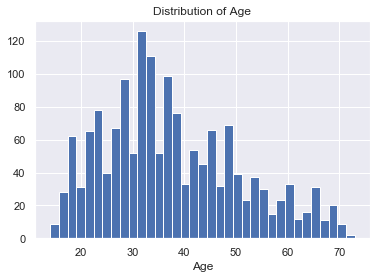

In [17]:
# Create a histogram of ages
df.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

The ages are mostly between 28 and 38. Recalling the describe() call results this makes sense. The average age was 37.5. 
There are less older customers, so this distribution is right-skewed because of its longer right tail. 
This could be because of the appeal of malls and the type of demographic that tends to shop there.

Text(0.5, 1.0, 'Distribution of Gender')

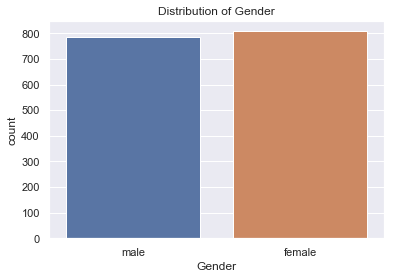

In [18]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=df);
plt.title('Distribution of Gender')

There are slightly more women than men in this data set. 
They will perhaps be a significant element in customer segmentation efforts later.

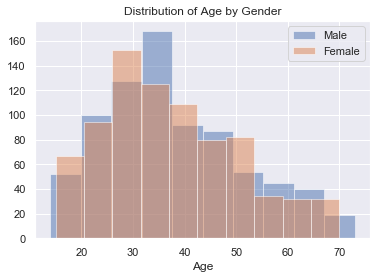

In [19]:
#we can add detail to this by overlaying two histograms, creating one age histogram for each gender.
plt.hist('Age', data=df[df['Gender'] == 'male'], alpha=0.5, label='Male');
plt.hist('Age', data=df[df['Gender'] == 'female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

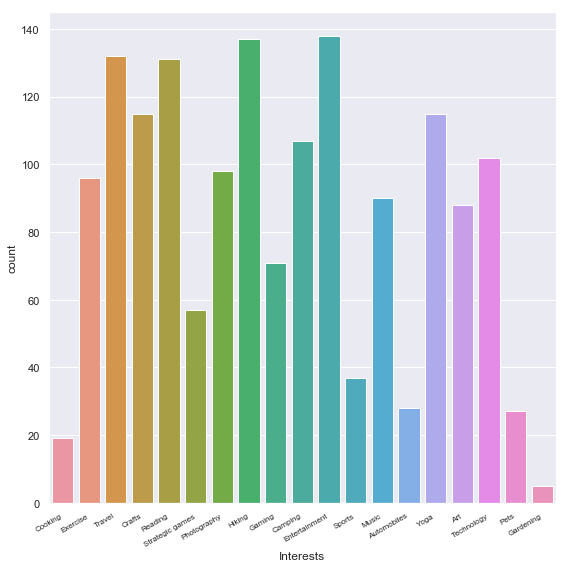

In [20]:
ncount = len(df)
plt.figure(figsize=(8,8))
ax = sns.countplot(data=df, x = 'Interests')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8, rotation=30, ha="right")
plt.tight_layout()
plt.show()
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')

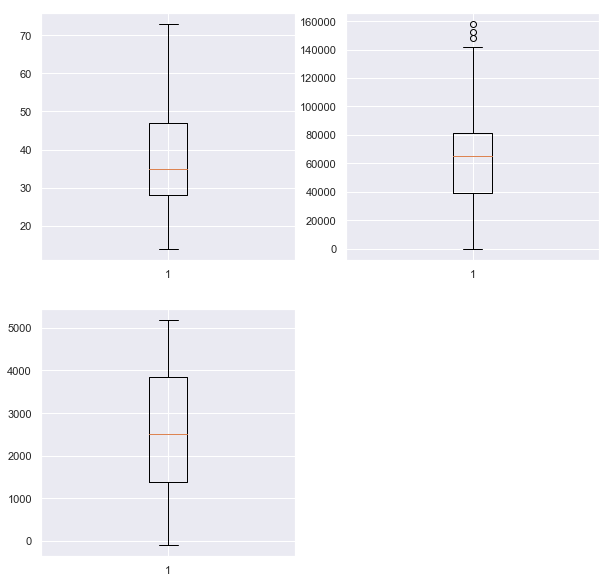

In [26]:
fig = plt.figure(figsize = (10,10))
a1 = fig.add_subplot(2,2,1)
a2 = fig.add_subplot(2,2,2)
a3 = fig.add_subplot(2,2,3)
a1.boxplot(df['Age'])
a2.boxplot(df['Annual Income'])
a3.boxplot(df['Total Spending'])
plt.show()

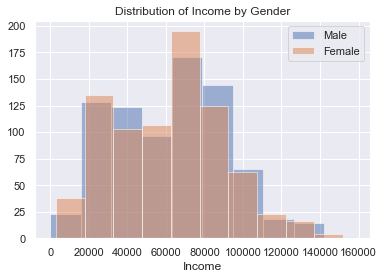

In [29]:
# Histogram of income by gender
plt.hist('Annual Income', data=df[df['Gender'] == 'male'], alpha=0.5, label='Male');
plt.hist('Annual Income', data=df[df['Gender'] == 'female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income');
plt.legend();

The women and men in this data set make apx equal amount of money.

In [34]:
# Create data sets by gender to save time in the future since gender seems to significantly impact other variables
male_customers = df[df['Gender'] == 'male']
female_customers = df[df['Gender'] == 'female']

# Print the average total spending amount for men and women
print(male_customers['Total Spending'].mean())
print(female_customers['Total Spending'].mean())

2554.9170918367345
2595.7998143564355


,Age,Annual Income,Total Spending
Age,1.000000,-0.023624,-0.371004
Annual Income,-0.023624,1.000000,0.014862
Total Spending,-0.371004,0.014862,1.000000


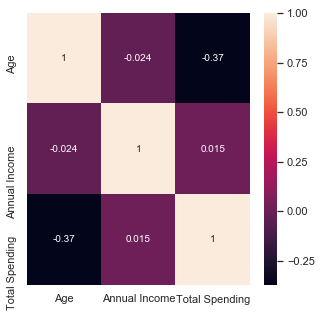

In [30]:
plt.figure(figsize=(5,5))
c= df.corr()
sns.heatmap(c,annot=True)
c

There is somewhat strong correlation between Age and Total spending features.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


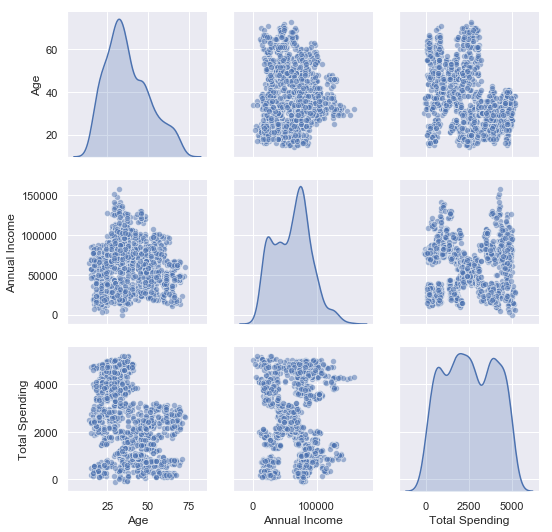

In [31]:
sns.pairplot(df, diag_kind = 'kde', plot_kws={'alpha': 0.5})

Text(0.5, 1.0, 'Age to Income, Colored by Gender')

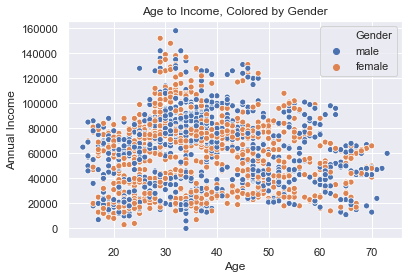

In [32]:
sns.scatterplot('Age', 'Annual Income', hue='Gender', data=df)
plt.title('Age to Income, Colored by Gender')

We can now see that slight positive correlation.

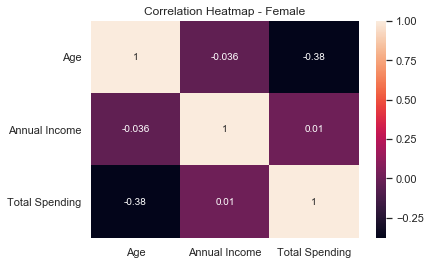

In [35]:
#Lets check  if there is a stronger correlation for men or women. 
#We check that out with two heat maps on the gender-specific data frames created earlier.
plt.title('Correlation Heatmap - Female');

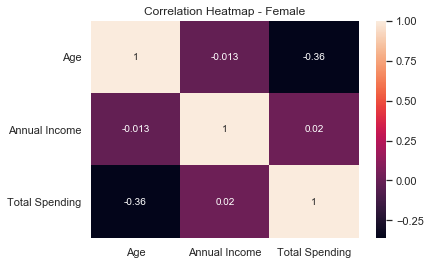

In [36]:
sns.heatmap(male_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Female');

Age slightly strongly affects total spending for women in this case. Nothing else is really strongly correlated enough to say much of anything.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


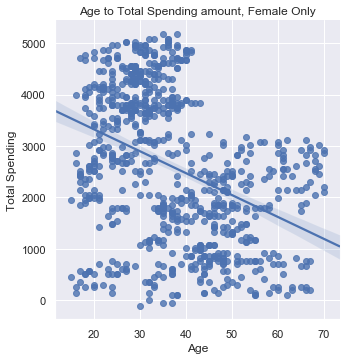

In [38]:
#Scatter of age to spending score for women, with a regression line and bootstrap interval about the line
sns.lmplot('Age', 'Total Spending', data=female_customers);
plt.title('Age to Total Spending amount, Female Only');

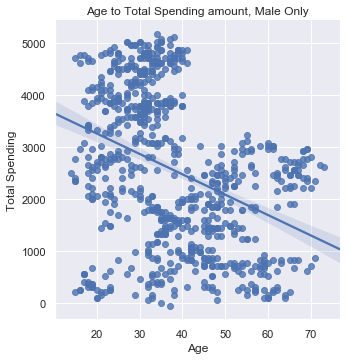

In [40]:
#Scatter of age to spending score for women, with a regression line and bootstrap interval about the line
sns.lmplot('Age', 'Total Spending', data=male_customers);
plt.title('Age to Total Spending amount, Male Only');

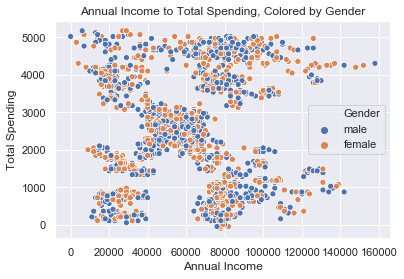

In [39]:
sns.scatterplot('Annual Income', 'Total Spending', hue='Gender', data=df);
plt.title('Annual Income to Total Spending, Colored by Gender');

There is some patterning here. Zero correlation though. But we can think of these as customer segments:<br>
1)Low income, low total spending<br>
2)Low income, high total spending<br>
3)Mid income, medium total spending<br>
4)High income, low totalspending<br>
5)High income, high total spending<br>